%run feature_engineering.ipynb

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.metrics import mean_squared_error


In [12]:
%run feature_engineering.ipynb

In [13]:
df_hospital = df_hospital
df_portobello = df_portobello
df_hospital.set_index("TIME",inplace=True,drop=True)
df_portobello.set_index("TIME",inplace=True,drop=True)


In [14]:
def get_X_and_y(df:pd.DataFrame):
    
    
    y=df["AVAILABLE BIKES"]
    X = df.drop(axis=1,columns=["BIKE STANDS","AVAILABLE BIKES"])
    return X,y

In [15]:
X_portobello,y_portobello=get_X_and_y(df_portobello)
X_hospital,y_hospital=get_X_and_y(df_hospital)
X_hospital

,DAY OF WEEK,HOUR,MINUTE,10MIN,20MIN,30MIN,1DAY,2DAY,3DAY,1WEEK
TIME,,,,,,,,,,
2020-02-04 00:00:02,0.000000,0.0,0.000000,0.100,0.075,0.075,0.275,0.625,0.850,0.5
2020-02-04 00:05:02,0.000000,0.0,0.087719,0.100,0.075,0.075,0.275,0.625,0.875,0.5
2020-02-04 00:10:02,0.000000,0.0,0.175439,0.100,0.100,0.075,0.275,0.625,0.875,0.5
2020-02-04 00:15:02,0.000000,0.0,0.263158,0.100,0.100,0.075,0.275,0.650,0.875,0.5
2020-02-04 00:20:02,0.000000,0.0,0.350877,0.100,0.100,0.100,0.275,0.650,0.875,0.5
...,...,...,...,...,...,...,...,...,...,...
2020-03-12 23:35:02,0.333333,1.0,0.614035,0.575,0.575,0.575,0.225,0.500,0.450,0.7
2020-03-12 23:40:02,0.333333,1.0,0.701754,0.575,0.575,0.575,0.225,0.500,0.450,0.7
2020-03-12 23:45:02,0.333333,1.0,0.789474,0.575,0.575,0.575,0.250,0.500,0.450,0.7


In [16]:
ridge_model_portobello = Ridge()
ridge_model_portobello.fit(X_portobello,y_portobello)

ridge_model_hospital = Ridge()
ridge_model_hospital.fit(X_hospital,y_hospital)

Ridge()

In [17]:
df=pd.DataFrame({"Feature Name":ridge_model_hospital.feature_names_in_,
"Hospital":ridge_model_hospital.coef_,
"Portobello":ridge_model_portobello.coef_})
df.set_index("Feature Name",inplace=True)

df

,Hospital,Portobello
Feature Name,,
DAY OF WEEK,-0.019416,-0.023726
HOUR,0.022975,0.057426
MINUTE,0.003457,-0.002845
10MIN,0.990058,0.838276
20MIN,-0.089607,-0.122865
30MIN,-0.021690,0.068136
1DAY,0.065358,0.051052
2DAY,0.006644,0.030766
3DAY,0.021128,0.025769


Text(0, 0.5, 'Linear Model Coefficient')

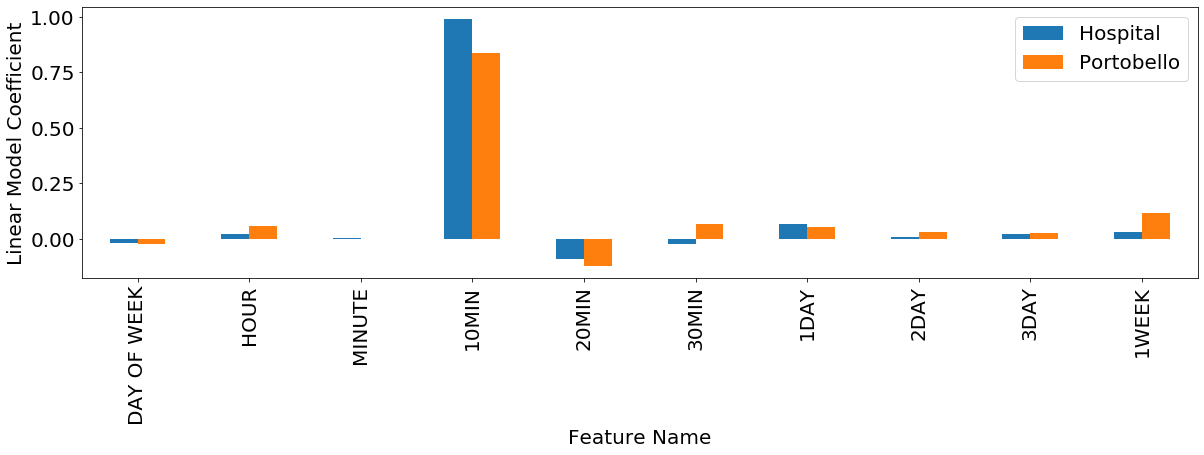

In [18]:
plt.rc('font',size=20)
df.plot.bar(figsize=(20,5))
plt.ylabel("Linear Model Coefficient")


In [19]:
X_portobello=X_portobello.to_numpy()
y_portobello=y_portobello.to_numpy()

MSE: 0.0168711634235962


Text(0.5, 1.0, 'Ridge Regression Model. MSE: 0.0168711634235962')

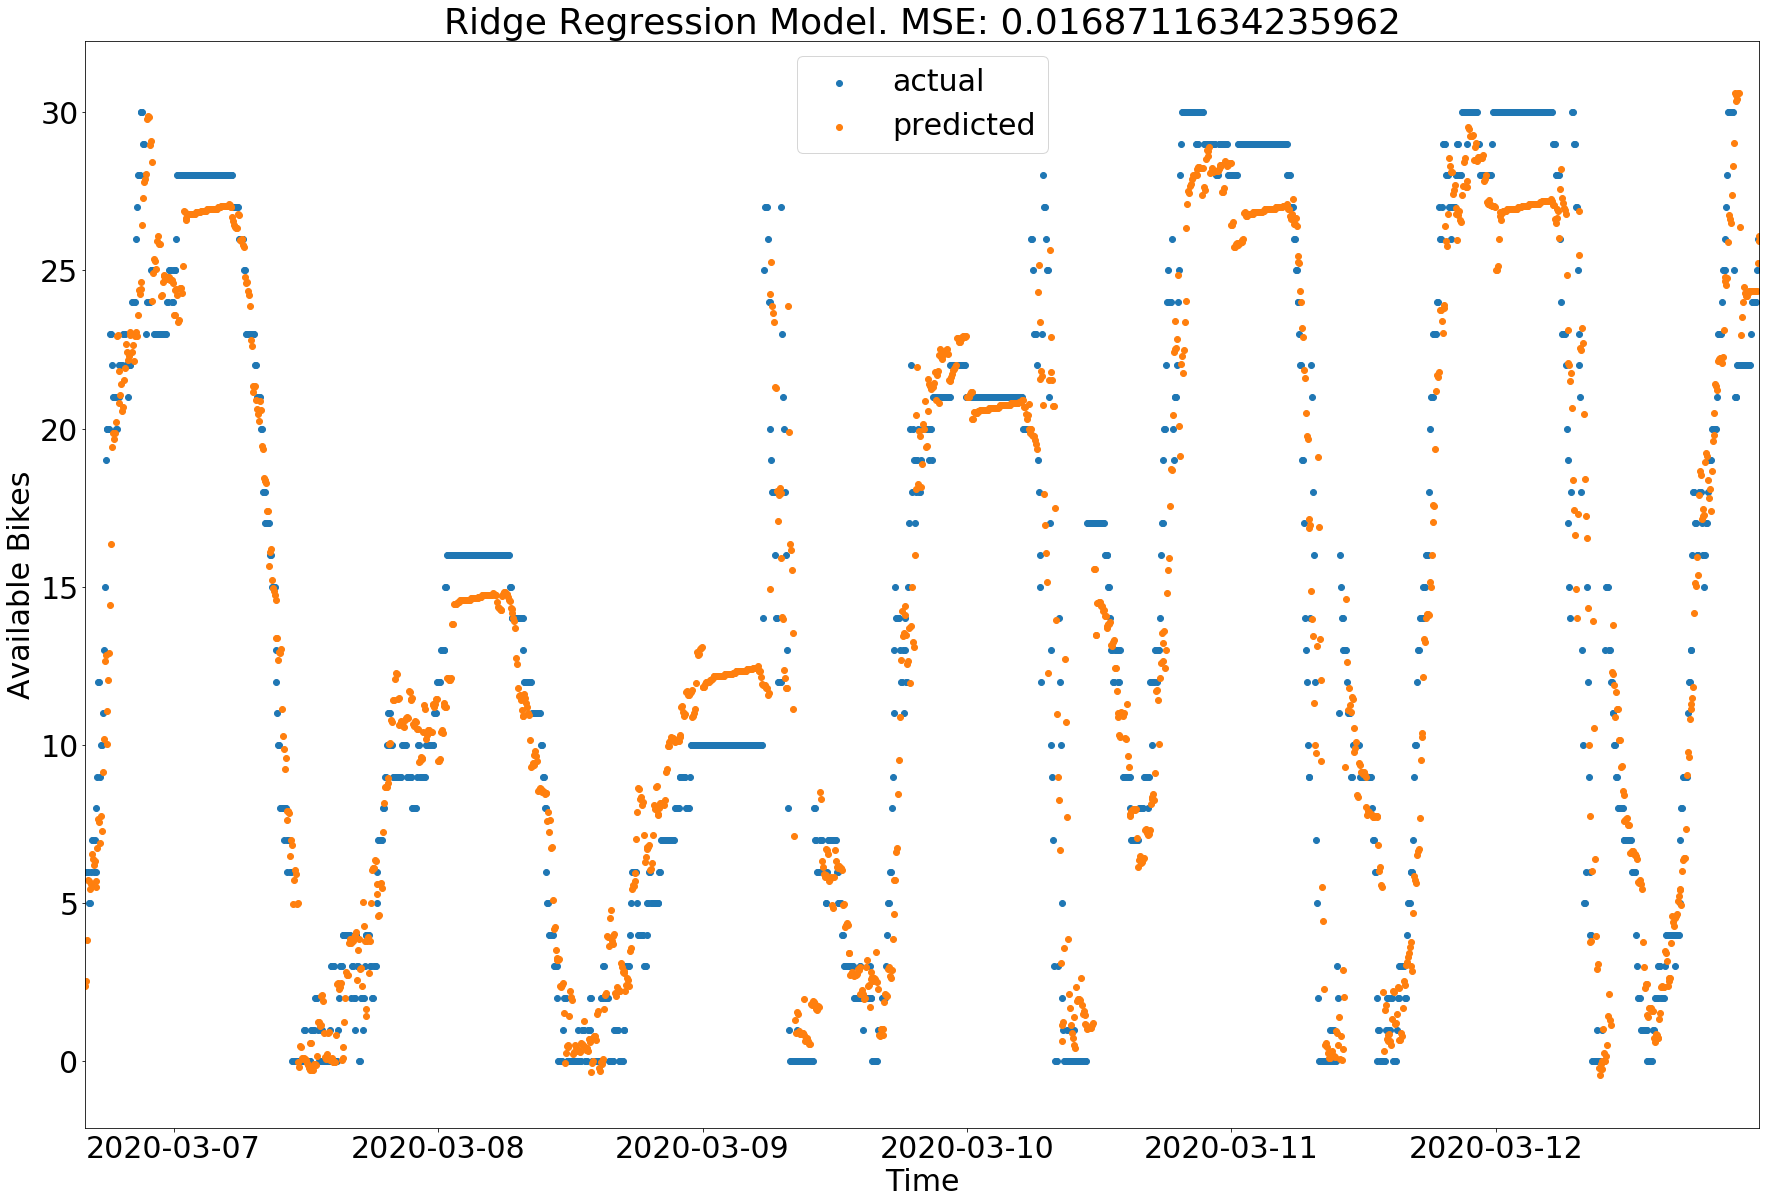

In [20]:
cv = TimeSeriesSplit(n_splits=5)
mse_scores=[]
i=0

for train, test in cv.split(X_portobello):
    ridge_model_portobello.fit(X_portobello[train], y_portobello[train])
    ypred = ridge_model_portobello.predict(X_portobello[test])
    mse_scores.append(mean_squared_error(y_portobello[test], ypred))
    i=i+1
    if i == 5:
        plt.rc('font',size=30)
        plt.figure(figsize=(30,20))
        plt.scatter(df_portobello.iloc[test].index,y_portobello[test]*30,label="actual",marker='o')
        plt.scatter(df_portobello.iloc[test].index,ypred*30,label="predicted")
        plt.xlim(df_portobello.iloc[test].index[0],df_portobello.iloc[test].index[-1])
        plt.legend()
        plt.xlabel("Time")
        plt.ylabel("Available Bikes")
        

print("MSE: "+str(np.mean(mse_scores)))
plt.title("Ridge Regression Model. MSE: "+str(np.mean(mse_scores)))